#### Sự phổ biến ngày càng tăng của thời trang lấy cảm hứng từ Hàn Quốc đã tiếp quản bán lẻ điện tử ở Philippines. Các doanh nhân đang bắt kịp xu hướng ngày càng tăng này bằng cách bán các sản phẩm lấy cảm hứng từ thời trang Hàn Quốc của họ trên các nền tảng trực tuyến khác nhau: Thông tin thu thập được từ shop bao gồm:<br>
- date_collected	ngày lấy dữ liệu<br>
- shopid	shopid<br>
- name	tên shop<br>
- join_month	Tháng  gia nhập<br>
- join_day	Ngày gia nhập<br>
- join_year	Năm gia nhập <br>
- item_count	số lượng sản phẩm<br>
- follower_count	Số lượng theo dõi<br>
- response_time	Thời gian phản hồi<br>
- response_rate	Tỷ lệ phản hồi<br>
- shop_location	Địa chỉ cửa hàng<br>
- rating_bad	số lượt khách hàng đánh giá xấu<br>
- rating_good	số lượt khách hàng đánh giá tốt<br>
- rating_normal	số lượt khách hàng đánh giá trung bình<br>
- rating_star	Điểm đánh giá trung bình<br>
- is_shopee_verified	cửa hàng đã được xác thực hay chưa<br>
- is_official_shop	Có cửa hàng chính thức hay không<br>

1. Vẽ biểu đồ so sánh số lượng shop gia nhập theo các năm.<br>
2. Vẽ biểu đồ thể hiện mối quan hệ giữa tỉ lệ phản hồi với số lượt khách hàng đánh giá tốt.<br>
3. Vẽ biểu đồ thể hiện mối quan hệ giữa thời gian phản hồi (đơn vị giây) với số lượt khách hàng đánh giá xấu.<br>
4. Vẽ biểu đồ thể hiện xu hướng của số lượng shop gia nhập theo thời gian.<br>
5. Vẽ biểu đồ thể hiện phân bố của điểm đánh giá trung bình. <br>
6. Vẽ biểu đồ kết hợp để trực quan hóa thông tin sau:
- So sánh số lượng shop gia nhập theo các năm.
- Xu hướng của số lượng shop gia nhập theo từng tháng trong từng năm.
7. Vẽ biểu đồ tần số số lượng shop gia nhập theo các năm.
8. Vẽ biểu đồ tần số của cửa hàng chính thức và không chính thức. 
9. Vẽ biểu đồ tần số của cửa hàng được xác thực với chưa xác thực. 

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('shopeep.csv')
df.head(5)

,pk_shop,date_collected,shopid,name,join_month,join_day,join_year,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
0,20210613254711738,2021-06-13,254711738,hello.may.ph,April,27,2020,446,17487,10:13:55,96,NaN,181,17510,729,4.81,1,0
1,20210613314198143,2021-06-13,314198143,love.women.shop,September,25,2020,263,8574,10:43:05,73,"San Nicolas,Metro Manila",78,2656,198,4.68,0,0
2,2021061310377223,2021-06-13,10377223,R&O RedOrange,September,27,2016,209,660417,08:32:07,90,"Pasay City,Metro Manila",4647,1071829,18073,4.91,1,0
3,2021061321407329,2021-06-13,21407329,patriciacai,April,30,2017,165,18787,09:10:38,94,"Binondo,Metro Manila",44,18959,215,4.94,1,0
4,2021061311187885,2021-06-13,11187885,Little Market Manila,October,18,2016,467,67371,11:40:59,89,"Caloocan City,Metro Manila",680,39252,2383,4.73,1,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pk_shop             746 non-null    int64  
 1   date_collected      746 non-null    object 
 2   shopid              746 non-null    int64  
 3   name                746 non-null    object 
 4   join_month          746 non-null    object 
 5   join_day            746 non-null    int64  
 6   join_year           746 non-null    int64  
 7   item_count          746 non-null    int64  
 8   follower_count      746 non-null    int64  
 9   response_time       746 non-null    object 
 10  response_rate       746 non-null    int64  
 11  shop_location       428 non-null    object 
 12  rating_bad          746 non-null    int64  
 13  rating_good         746 non-null    int64  
 14  rating_normal       746 non-null    int64  
 15  rating_star         740 non-null    float64
 16  is_shope

KIỂM tra khuyết thiếu và giá trị ngoại lai

In [41]:
df.isnull().sum()

pk_shop                 0
date_collected          0
shopid                  0
name                    0
join_month              0
join_day                0
join_year               0
item_count              0
follower_count          0
response_time           0
response_rate           0
shop_location         318
rating_bad              0
rating_good             0
rating_normal           0
rating_star             6
is_shopee_verified      0
is_official_shop        0
dtype: int64

<AxesSubplot:>

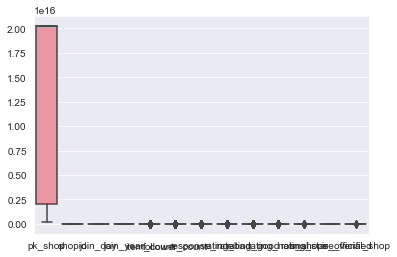

In [42]:
sns.boxplot(data=df)

#### 1. Vẽ biểu đồ so sánh số lượng shop gia nhập theo các năm.<br>

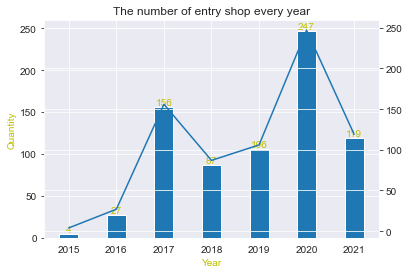

In [43]:
data1 = df.groupby(df['join_year'])['shopid'].count()
plt.bar(x=data1.index, height=data1.values, width=0.4)
plt.title('The number of entry shop every year')
ax1 = plt.gca()
ax1.set_xlabel('Year',color='y')
ax1.set_ylabel('Quantity', color='y')
for bar in ax1.containers:
    ax1.bar_label(bar, color='y')
ax2 = ax1.twinx()
ax2.plot(data1.index,data1.values)
plt.show()

#### 2. Vẽ biểu đồ thể hiện mối quan hệ giữa tỉ lệ phản hồi với số lượt khách hàng đánh giá tốt.<br>

<function matplotlib.pyplot.show(close=None, block=None)>

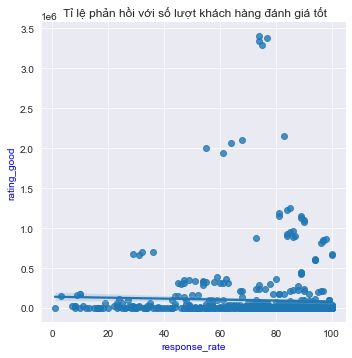

In [44]:
sns.set_style('darkgrid')
sns.lmplot(x='response_rate', y='rating_good', data=df)
plt.title(' Tỉ lệ phản hồi với số lượt khách hàng đánh giá tốt')
ax = plt.gca()
ax.set_xlabel('response_rate',color='b')
ax.set_ylabel('rating_good', color='b')
plt.show

#### 3. Vẽ biểu đồ thể hiện mối quan hệ giữa thời gian phản hồi (đơn vị giây) với số lượt khách hàng đánh giá xấu.

ValueError: could not convert string to float: ' 10:13:55'

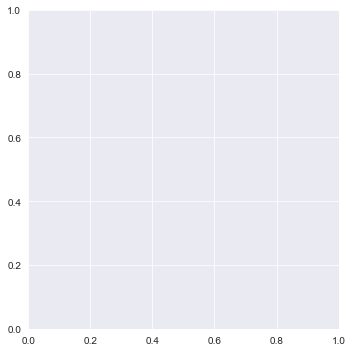

In [45]:
# plt.scatter(x=df['response_time'].values, y= df['rating_bad'].values)
# plt.show
# sns.lmplot(x='response_time', y='rating_bad', data=df)
# plt.show

#### 4. Vẽ biểu đồ thể hiện xu hướng của số lượng shop gia nhập theo thời gian.

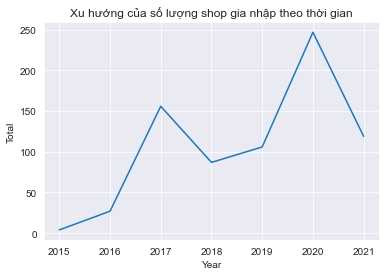

In [46]:
data1 = df.groupby(df['join_year'])['shopid'].count()
plt.title('Xu hướng của số lượng shop gia nhập theo thời gian')
plt.xlabel('Year')
plt.ylabel('Total')
plt.plot(data1.index, data1.values)
plt.show()


#### 5. Vẽ biểu đồ thể hiện phân bố của điểm đánh giá trung bình.

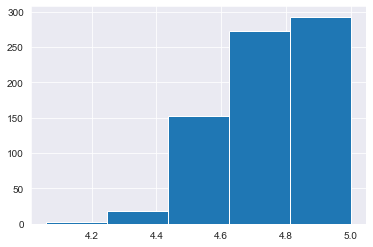

In [47]:
plt.hist(df['rating_star'], bins=5)
plt.show()

In [48]:
# df['response_time'].values

array([' 10:13:55', ' 10:43:05', ' 08:32:07', ' 09:10:38', ' 11:40:59',
       ' 12:33:58', ' 11:00:46', ' 11:03:13', ' 10:14:49', ' 09:41:23',
       ' 08:55:06', ' 12:07:08', ' 11:57:43', ' 10:43:46', ' 11:46:01',
       ' 09:36:00', ' 10:28:02', ' 08:05:48', ' 10:13:30', ' 10:03:06',
       ' 09:34:41', ' 09:52:55', ' 11:25:23', ' 09:26:55', ' 14:56:24',
       ' 11:43:29', ' 13:09:38', ' 11:14:33', ' 09:44:54', ' 08:35:40',
       ' 11:43:52', ' 09:37:23', ' 11:03:30', ' 09:13:35', ' 10:13:24',
       ' 10:40:12', ' 08:28:44', ' 11:45:05', ' 13:16:46', ' 12:48:36',
       ' 10:58:45', ' 11:42:04', ' 08:25:22', ' 08:07:02', ' 11:01:08',
       ' 11:49:38', ' 09:56:42', ' 11:32:50', ' 11:00:36', ' 10:10:57',
       ' 11:41:13', ' 11:45:46', ' 11:30:22', ' 09:05:28', ' 10:40:10',
       ' 12:45:44', ' 09:30:37', ' 12:06:34', ' 09:19:38', ' 10:24:59',
       ' 12:30:35', ' 09:42:10', ' 08:54:58', ' 08:38:18', ' 11:21:03',
       ' 10:54:52', ' 09:30:18', ' 08:00:13', ' 12:23:35', ' 11:

In [49]:
# df['response_time'] = pd.to_datetime(df['response_time'], format=' %H:%M:%S').dt.total_seconds()

AttributeError: 'DatetimeProperties' object has no attribute 'total_seconds'

6. Vẽ biểu đồ kết hợp để trực quan hóa thông tin sau:
- So sánh số lượng shop gia nhập theo các năm.
- Xu hướng của số lượng shop gia nhập theo từng tháng trong từng năm.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pk_shop             746 non-null    int64  
 1   date_collected      746 non-null    object 
 2   shopid              746 non-null    int64  
 3   name                746 non-null    object 
 4   join_month          746 non-null    object 
 5   join_day            746 non-null    int64  
 6   join_year           746 non-null    int64  
 7   item_count          746 non-null    int64  
 8   follower_count      746 non-null    int64  
 9   response_time       746 non-null    object 
 10  response_rate       746 non-null    int64  
 11  shop_location       428 non-null    object 
 12  rating_bad          746 non-null    int64  
 13  rating_good         746 non-null    int64  
 14  rating_normal       746 non-null    int64  
 15  rating_star         740 non-null    float64
 16  is_shope

#### 7. Vẽ biểu đồ tần số số lượng shop gia nhập theo các năm.

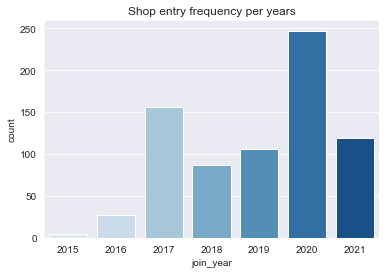

In [57]:
sns.countplot(x='join_year',data=df, palette='Blues')
ax = plt.gca()
ax.set_title('Shop entry frequency per years')
plt.show()

#### 8. Vẽ biểu đồ tần số của cửa hàng chính thức và không chính thức. 

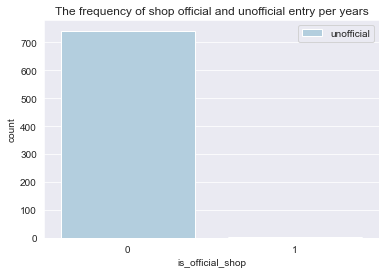

In [60]:
sns.countplot(x='is_official_shop',data=df, palette='Blues')
ax = plt.gca()
ax.set_title('The frequency of shop official and unofficial entry per years')
ax.legend(loc='upper right', labels=['unofficial', 'official'])
plt.show()

#### 9. Vẽ biểu đồ tần số của cửa hàng được xác thực với chưa xác thực. 

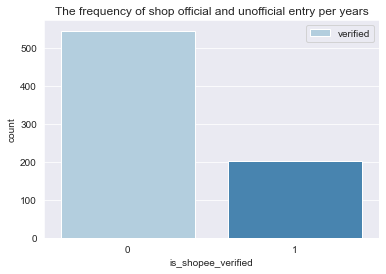

In [71]:
sns.countplot(x='is_shopee_verified',data=df,palette='Blues')
ax = plt.gca()
ax.set_title('The frequency of shop official and unofficial entry per years')
ax.legend(loc='upper right', labels=['verified', 'unverified'])
plt.show()